# Collection of Data for Snowpack Layer Prediction and Analysis

In [89]:
import importlib
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily
import utils
import pandas as pd
import os

In [68]:
# Getting station data:
stations = Stations()
stations = stations.nearby(43.5875, 110.8279) # Coordinates of Jackson Hole
station = stations.fetch(1)
print(station.wmo[0])


44358


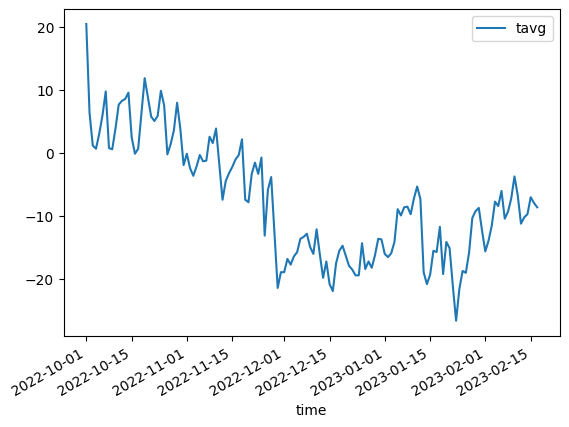

In [70]:
# Getting daily data:
start = datetime(2022, 10, 1)
end = datetime(2023, 2, 17)

daily_data = Daily(station.wmo[0], start, end)
daily_data = daily_data.fetch()

daily_data.plot(y=['tavg'])
plt.show()


# Snowpilot Data Collection

In [100]:
importlib.reload(utils)

sp_data = []
for filename in os.listdir("input_data/snowpilot_data"): 
    filename = "input_data/snowpilot_data/" + filename
    timestamp = int(utils.snowpilot_xml_to_dict(filename)['@timestamp'])
    timestamp /= 1000 # Converting from milliseconds

    date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')

    layers = utils.snowpilot_xml_to_dict(filename)['Layer']

    layers_dict = {}

    for layer in layers:
        layers_dict[layer['@layerNumber']] = [layer['@startDepth'], layer['@endDepth'], layer['@hardness1']]

    chart_df = pd.DataFrame.from_dict(layers_dict, orient='index', columns=['startDepth', 'endDepth', 'hardness1'])
    sp_data.append((date, chart_df))
sp_data

SouthBowl_Jan13.xml


FileNotFoundError: [Errno 2] No such file or directory: 'SouthBowl_Jan13.xml'

## Ideas:

- Really only need to predict the hardness of the snow layers. Graph can be made from everything else
- Snow depth can be retrieved from the Snowpilot Data
- Take basically all of the attributes possible from the weather data, use decision tree to find the most influential factors in determinding the layer hardness
    - Will need to look at (some) historical data for the best results here
- End results does not have to be the same format of the Snowpilot charts
    - Could have the layers be color coded